In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
airlines_project_df = pd.read_csv('flights.csv')

C:\Users\v_moe\AppData\Local\Temp\ipykernel_74344\376618483.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  airlines_project_df = pd.read_csv('flights.csv')


In [3]:
airlines_project_df.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
airlines_project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
airlines_project_revised_df = airlines_project_df.drop(columns=['TAIL_NUMBER', 'WHEELS_ON', 'WHEELS_OFF', 'TAXI_IN', 'TAXI_OUT', 'AIR_TIME'])

In [6]:
airlines_project_revised_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   ORIGIN_AIRPORT       object 
 7   DESTINATION_AIRPORT  object 
 8   SCHEDULED_DEPARTURE  int64  
 9   DEPARTURE_TIME       float64
 10  DEPARTURE_DELAY      float64
 11  SCHEDULED_TIME       float64
 12  ELAPSED_TIME         float64
 13  DISTANCE             int64  
 14  SCHEDULED_ARRIVAL    int64  
 15  ARRIVAL_TIME         float64
 16  ARRIVAL_DELAY        float64
 17  DIVERTED             int64  
 18  CANCELLED            int64  
 19  CANCELLATION_REASON  object 
 20  AIR_SYSTEM_DELAY     float64
 21  SECURITY_DELAY       float64
 22  AIRLINE_DELAY        float64
 23  LATE_AIRCRAFT_DELAY  float64
 24

In [7]:
airlines_project_revised_df['DATE'] = pd.to_datetime(airlines_project_revised_df[['YEAR', 'MONTH', 'DAY']])

In [8]:
airlines_project_revised_df = airlines_project_revised_df.drop(['YEAR', 'MONTH', 'DAY'], axis=1)

In [9]:
airlines_project_revised_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 23 columns):
 #   Column               Dtype         
---  ------               -----         
 0   DAY_OF_WEEK          int64         
 1   AIRLINE              object        
 2   FLIGHT_NUMBER        int64         
 3   ORIGIN_AIRPORT       object        
 4   DESTINATION_AIRPORT  object        
 5   SCHEDULED_DEPARTURE  int64         
 6   DEPARTURE_TIME       float64       
 7   DEPARTURE_DELAY      float64       
 8   SCHEDULED_TIME       float64       
 9   ELAPSED_TIME         float64       
 10  DISTANCE             int64         
 11  SCHEDULED_ARRIVAL    int64         
 12  ARRIVAL_TIME         float64       
 13  ARRIVAL_DELAY        float64       
 14  DIVERTED             int64         
 15  CANCELLED            int64         
 16  CANCELLATION_REASON  object        
 17  AIR_SYSTEM_DELAY     float64       
 18  SECURITY_DELAY       float64       
 19  AIRLINE_DELAY        

In [10]:
airlines_project_revised_df.set_index('DATE', inplace=True)

In [11]:
def delayed_flights(arrival_departure_time):
    flight_status = ''
    if arrival_departure_time > 0:
        flight_status = 'DELAYED'
    else:
        Flight_status = 'ON_TIME'
    return flight_status

In [12]:
airlines_project_revised_df['DEPARTURE_DELAY_STATUS'] = airlines_project_revised_df['DEPARTURE_DELAY'].apply(delayed_flights)

airlines_project_revised_df['ARRIVAL_DELAY_STATUS'] = airlines_project_revised_df['ARRIVAL_DELAY'].apply(delayed_flights)

In [13]:
airlines_project_revised_df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAY_STATUS,ARRIVAL_DELAY_STATUS
DATE,,,,,,,,,,,,,,,,,,,,,
2015-01-01,4,AS,98,ANC,SEA,5,2354.0,-11.0,205.0,194.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,,
2015-01-01,4,AA,2336,LAX,PBI,10,2.0,-8.0,280.0,279.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,,
2015-01-01,4,US,840,SFO,CLT,20,18.0,-2.0,286.0,293.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,,DELAYED
2015-01-01,4,AA,258,LAX,MIA,20,15.0,-5.0,285.0,281.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,,
2015-01-01,4,AS,135,SEA,ANC,25,24.0,-1.0,235.0,215.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,,


In [14]:
second_quarter_df = airlines_project_revised_df.loc['2015-05-01':'2015-08-31']

In [15]:
second_quarter_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2032144 entries, 2015-05-01 to 2015-08-31
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DAY_OF_WEEK             int64  
 1   AIRLINE                 object 
 2   FLIGHT_NUMBER           int64  
 3   ORIGIN_AIRPORT          object 
 4   DESTINATION_AIRPORT     object 
 5   SCHEDULED_DEPARTURE     int64  
 6   DEPARTURE_TIME          float64
 7   DEPARTURE_DELAY         float64
 8   SCHEDULED_TIME          float64
 9   ELAPSED_TIME            float64
 10  DISTANCE                int64  
 11  SCHEDULED_ARRIVAL       int64  
 12  ARRIVAL_TIME            float64
 13  ARRIVAL_DELAY           float64
 14  DIVERTED                int64  
 15  CANCELLED               int64  
 16  CANCELLATION_REASON     object 
 17  AIR_SYSTEM_DELAY        float64
 18  SECURITY_DELAY          float64
 19  AIRLINE_DELAY           float64
 20  LATE_AIRCRAFT_DELAY     float64
 21  WEATHER_DELAY   

In [16]:
delayed_takeoffs = second_quarter_df[second_quarter_df['DEPARTURE_DELAY_STATUS']=='DELAYED']



In [17]:
day_of_week_departure_df = pd.DataFrame(delayed_takeoffs['DAY_OF_WEEK'])

day_of_week_departure_df

,DAY_OF_WEEK
DATE,
2015-05-01,5
2015-05-01,5
2015-05-01,5
2015-05-01,5
2015-05-01,5
...,...
2015-08-31,1
2015-08-31,1
2015-08-31,1


In [18]:
departures_day_of_week_delays_df = pd.DataFrame(day_of_week_departure_df.groupby(['DAY_OF_WEEK']).value_counts())

departures_day_of_week_delays_df

,count
DAY_OF_WEEK,
1,121938
2,117239
3,114914
4,119828
5,119040
6,90131
7,111606


In [19]:
departures_day_of_week_delays_df = departures_day_of_week_delays_df.reset_index()

departures_day_of_week_delays_df

,DAY_OF_WEEK,count
0,1,121938
1,2,117239
2,3,114914
3,4,119828
4,5,119040
5,6,90131
6,7,111606


In [20]:
departures_day_of_week_delays_df['DAY_OF_WEEK'] = departures_day_of_week_delays_df['DAY_OF_WEEK'].map({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
                                                               5: 'Friday', 6: 'Saturday', 7: 'Sunday'})

departures_day_of_week_delays_df

,DAY_OF_WEEK,count
0,Monday,121938
1,Tuesday,117239
2,Wednesday,114914
3,Thursday,119828
4,Friday,119040
5,Saturday,90131
6,Sunday,111606


<Axes: title={'center': 'Delayed Departures by Day of the Week'}, xlabel='DAY_OF_WEEK'>

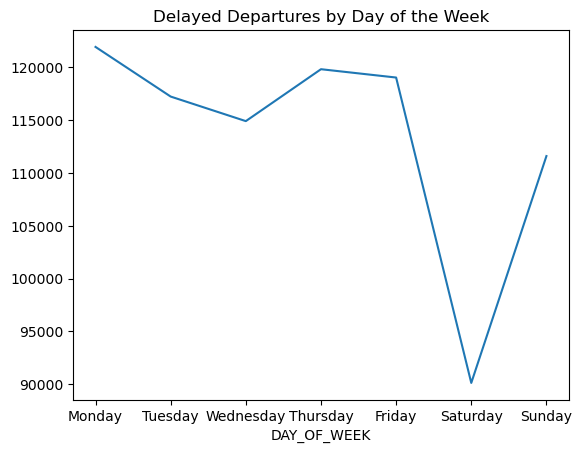

In [21]:
departures_day_of_week_delays_df.set_index('DAY_OF_WEEK')['count'].plot(title='Delayed Departures by Day of the Week')

In [22]:
delayed_landings_df = second_quarter_df[second_quarter_df['ARRIVAL_DELAY_STATUS']=='DELAYED']
delayed_landings_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 762775 entries, 2015-05-01 to 2015-08-31
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DAY_OF_WEEK             762775 non-null  int64  
 1   AIRLINE                 762775 non-null  object 
 2   FLIGHT_NUMBER           762775 non-null  int64  
 3   ORIGIN_AIRPORT          762775 non-null  object 
 4   DESTINATION_AIRPORT     762775 non-null  object 
 5   SCHEDULED_DEPARTURE     762775 non-null  int64  
 6   DEPARTURE_TIME          762775 non-null  float64
 7   DEPARTURE_DELAY         762775 non-null  float64
 8   SCHEDULED_TIME          762775 non-null  float64
 9   ELAPSED_TIME            762775 non-null  float64
 10  DISTANCE                762775 non-null  int64  
 11  SCHEDULED_ARRIVAL       762775 non-null  int64  
 12  ARRIVAL_TIME            762775 non-null  float64
 13  ARRIVAL_DELAY           762775 non-null  float64
 14  DIVE

In [48]:
delayed_departures_df = second_quarter_df[second_quarter_df['DEPARTURE_DELAY_STATUS']=='DELAYED']

grouped_data = second_quarter_df.groupby(['DAY_OF_WEEK']).agg({
    'DEPARTURE_DELAY': lambda x: (x > 15).sum(),
    'ARRIVAL_DELAY': lambda x: (x > 15).sum(),
    'CANCELLED': 'sum',
    'DIVERTED': 'sum'
}).reset_index()

grouped_data['DAY_OF_WEEK'] = grouped_data['DAY_OF_WEEK'].map({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
                                                               5: 'Friday', 6: 'Saturday', 7: 'Sunday'})

In [49]:
grouped_data

,DAY_OF_WEEK,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCELLED,DIVERTED
0,Monday,64046,64130,5819,1303
1,Tuesday,61623,61814,4556,1135
2,Wednesday,58695,57983,3539,864
3,Thursday,60482,60698,3018,903
4,Friday,56786,55309,2176,746
5,Saturday,42859,40787,2379,885
6,Sunday,54318,52394,3185,808


<Axes: title={'center': 'Total Delays for Top 9 Airlines'}, xlabel='DAY_OF_WEEK'>

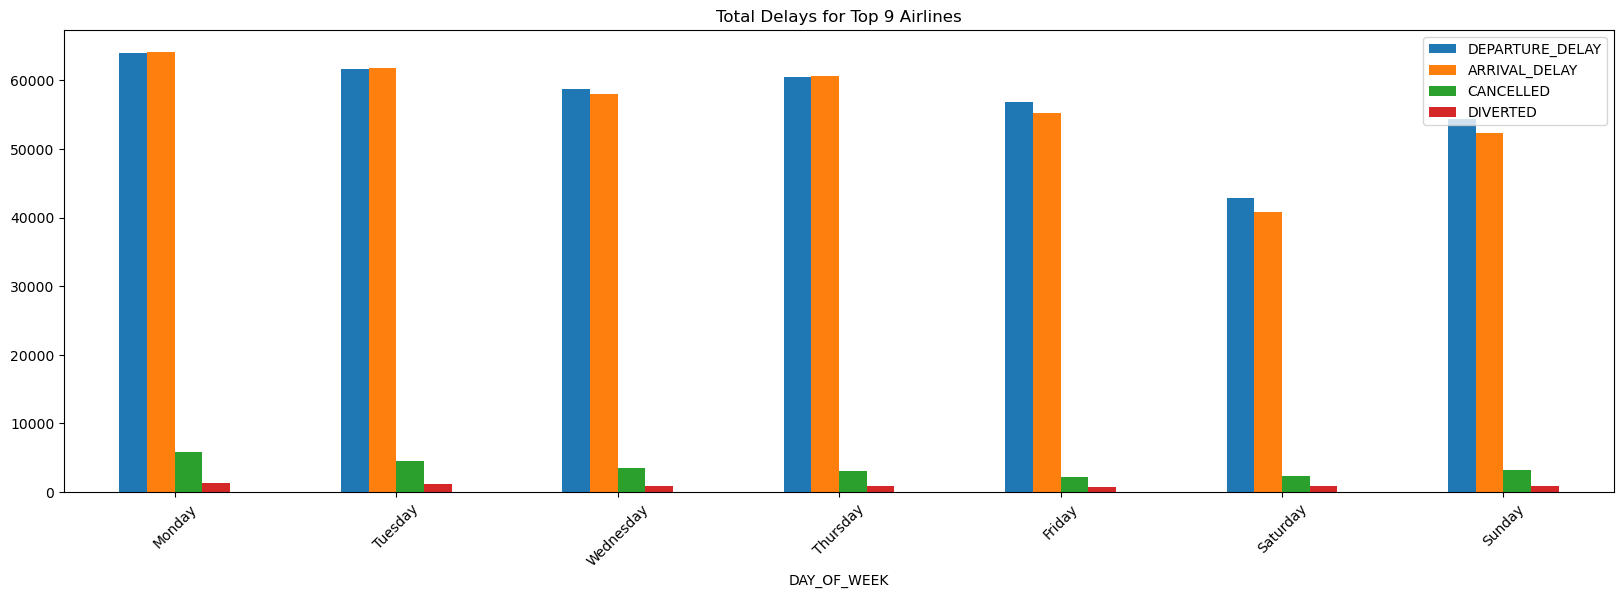

In [60]:
#grouped_data.groupby('DAY_OF_WEEK', 'AIRLINE').plot(title='Delayed Arrivals by Day of the Week')

#grouped_data.groupby('AIRLINE')['DEPARTURE_DELAY'].plot(title='Delayed Arrivals by Day of the Week')

grouped_data.plot(kind="bar", figsize=(20,6), x='DAY_OF_WEEK', rot=45, legend='best', title='Total Delays for Top 9 Airlines')

In [53]:
top_9_airlines_delayed = pd.DataFrame(second_quarter_df.groupby('AIRLINE')['DEPARTURE_DELAY'].sum().nlargest(9))

top_9_airlines_delayed


,DEPARTURE_DELAY
AIRLINE,
WN,6026130.0
UA,3286537.0
DL,2690592.0
AA,2635690.0
EV,2030161.0
OO,1659289.0
B6,1026120.0
NK,966827.0
MQ,963768.0


In [61]:
top_9_airlines_delayed = top_9_airlines_delayed.reset_index()

In [62]:
top_9_airlines_delayed['AIRLINE'] = top_9_airlines_delayed['AIRLINE'].map({'UA': 'UNITED AIRLINES', 'AA': 'AMERICAN AIRLINES', 'US': 'US AIRWAYS',
                                                      'F9': 'FRONTIER AIRLINES', 'B6': 'JETBLUE', 'OO': 'SKYWEST AIRLINES', 
                                                      'AS': 'ALASKA AIRLINES', 'NK': 'SPIRIT AIRLINES', 'WN': 'SOUTHWEST AIRLINES', 
                                                      'DL': 'DELTA AIRLINES', 'EV': 'ATLANTIC SE AIRLINES', 'HA': 'HAWAIIAN AIRLINES',
                                                      'MQ': 'AMERICAN EAGLE AIRLINES', 'VX': 'VIRGIN AMERICA'})

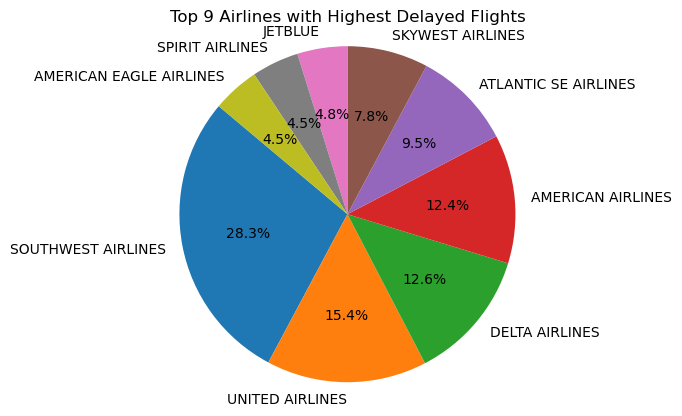

In [63]:
top_9_airlines_delayed.plot(kind='pie', legend=False, y='DEPARTURE_DELAY', ylabel='', labels=top_9_airlines_delayed['AIRLINE'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Top 9 Airlines with Highest Delayed Flights')
plt.tight_layout
#plt.(top_9_airlines_delayed.index, bbox_to_anchor=(1, 1), loc='best')
plt.show()